In [42]:
import plotly.express as px
import time
from fredapi import Fred

In [2]:
# Setting the style for the plots.'fivethirtyeight' is a predefined style theme for plots, which includes colors, fonts, etc
plt.style.use('fivethirtyeight')

# Extracting the list of colors from the current style theme
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"];

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Fred API Key
fred_key = "1a37b4046e1f3927c3c90c753cbeaf70"

# 1. Create the Fred object

In [6]:
fred = Fred(fred_key)

# 2. Load the unemployment rate data for each state! 

In [7]:
#Searching for series containing 'unemployment rate state' in title
unemp_search_result = fred.search('Unemployment rate state', filter=('frequency', 'Monthly'))

#filtering the series based on the given conditions
unemp_search_result.query('seasonal_adjustment =="Seasonally Adjusted" and units == "Percent" ', inplace=True)

In [8]:
unemp_search_result.shape

(161, 15)

In [10]:
#fetching only those series that contain 'Unemployment Rate in' in their title
unemp_search_result = unemp_search_result[unemp_search_result['title'].str.contains('Unemployment Rate in')]
unemp_search_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-07-08,2024-07-08,Unemployment Rate in California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:02-05:00,64,None
TXUR,TXUR,2024-07-08,2024-07-08,Unemployment Rate in Texas,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,56,None
NYUR,NYUR,2024-07-08,2024-07-08,Unemployment Rate in New York,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,53,None
FLUR,FLUR,2024-07-08,2024-07-08,Unemployment Rate in Florida,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,51,None
PAUR,PAUR,2024-07-08,2024-07-08,Unemployment Rate in Pennsylvania,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,44,None
OHUR,OHUR,2024-07-08,2024-07-08,Unemployment Rate in Ohio,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,41,None
MIUR,MIUR,2024-07-08,2024-07-08,Unemployment Rate in Michigan,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,38,None
ALUR,ALUR,2024-07-08,2024-07-08,Unemployment Rate in Alabama,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,38,None
MAUR,MAUR,2024-07-08,2024-07-08,Unemployment Rate in Massachusetts,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,37,None


In [12]:
#There are some series which we do not want. We require only series containing Unemp Rate in different states
#So filter the series again 
unemp_search_result = unemp_search_result[unemp_search_result.index.str.contains('UR')]

#Drop some unwanted series
unemp_search_result.drop(['CMWRUR','CSOUUR','CNERUR','CWSTUR', 'CNEWUR'],axis=0, inplace=True)

unemp_search_result

C:\Users\harshit\AppData\Local\Temp\ipykernel_16860\3566212289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_search_result.drop(['CMWRUR','CSOUUR','CNERUR','CWSTUR', 'CNEWUR'],axis=0, inplace=True)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-07-08,2024-07-08,Unemployment Rate in California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:02-05:00,64,None
TXUR,TXUR,2024-07-08,2024-07-08,Unemployment Rate in Texas,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,56,None
NYUR,NYUR,2024-07-08,2024-07-08,Unemployment Rate in New York,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,53,None
FLUR,FLUR,2024-07-08,2024-07-08,Unemployment Rate in Florida,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,51,None
PAUR,PAUR,2024-07-08,2024-07-08,Unemployment Rate in Pennsylvania,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,44,None
OHUR,OHUR,2024-07-08,2024-07-08,Unemployment Rate in Ohio,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:04-05:00,41,None
MIUR,MIUR,2024-07-08,2024-07-08,Unemployment Rate in Michigan,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,38,None
ALUR,ALUR,2024-07-08,2024-07-08,Unemployment Rate in Alabama,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,38,None
MAUR,MAUR,2024-07-08,2024-07-08,Unemployment Rate in Massachusetts,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:05-05:00,37,None


In [14]:
#Creating a list that will hold the unemployment rate data for all the states
unemp_rate_list = []

In [15]:
#Append the unemployment rate data for each state into the 'unemp_rate_list' one-by-one
for series_id in unemp_search_result.index:
    series = fred.get_series(series_id) #Getting all the series from the Fred repository one-by-one
    unemp_rate_list.append(series.to_frame(name = series_id)) #converting each series into dataframe before appending it to 'unemp_rate_list'

In [18]:
#Now, we are concating all the dataframes in the 'unemp_rate_list', into a single dataframe
unemp_rate_df = pd.concat(unemp_rate_list, axis=1)

#This is how the final dataframe looks like!
#Each column contains the historical unemp rate data for an individual state
unemp_rate_df

<IPython.core.display.Javascript object>

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,...,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,...,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,...,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0


# Replace the State IDs with State Names in the Unemp Rate Dataframe

In [19]:
# We will get the names of states in the same order in which our dataframe contains the data for the states
# For this get the names from the 'title' column of the dataframe obtain from the search
state_names = unemp_search_result['title'].str.replace('Unemployment Rate in ', '').to_list()

In [21]:
# Replacing State IDs with the  names of states in the columns
unemp_rate_df.columns = state_names

unemp_rate_df

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,...,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,...,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0


# Historical Unemployment Rate in the State of New York

In [43]:
#Plotting a line graph, which depicts the historical Unemployment rate in the state of NewYork
px.line(unemp_rate_df['New York'])

# Comparing the Unemployment Rate of all states In the Month of Covid Outbreak (May 2020)



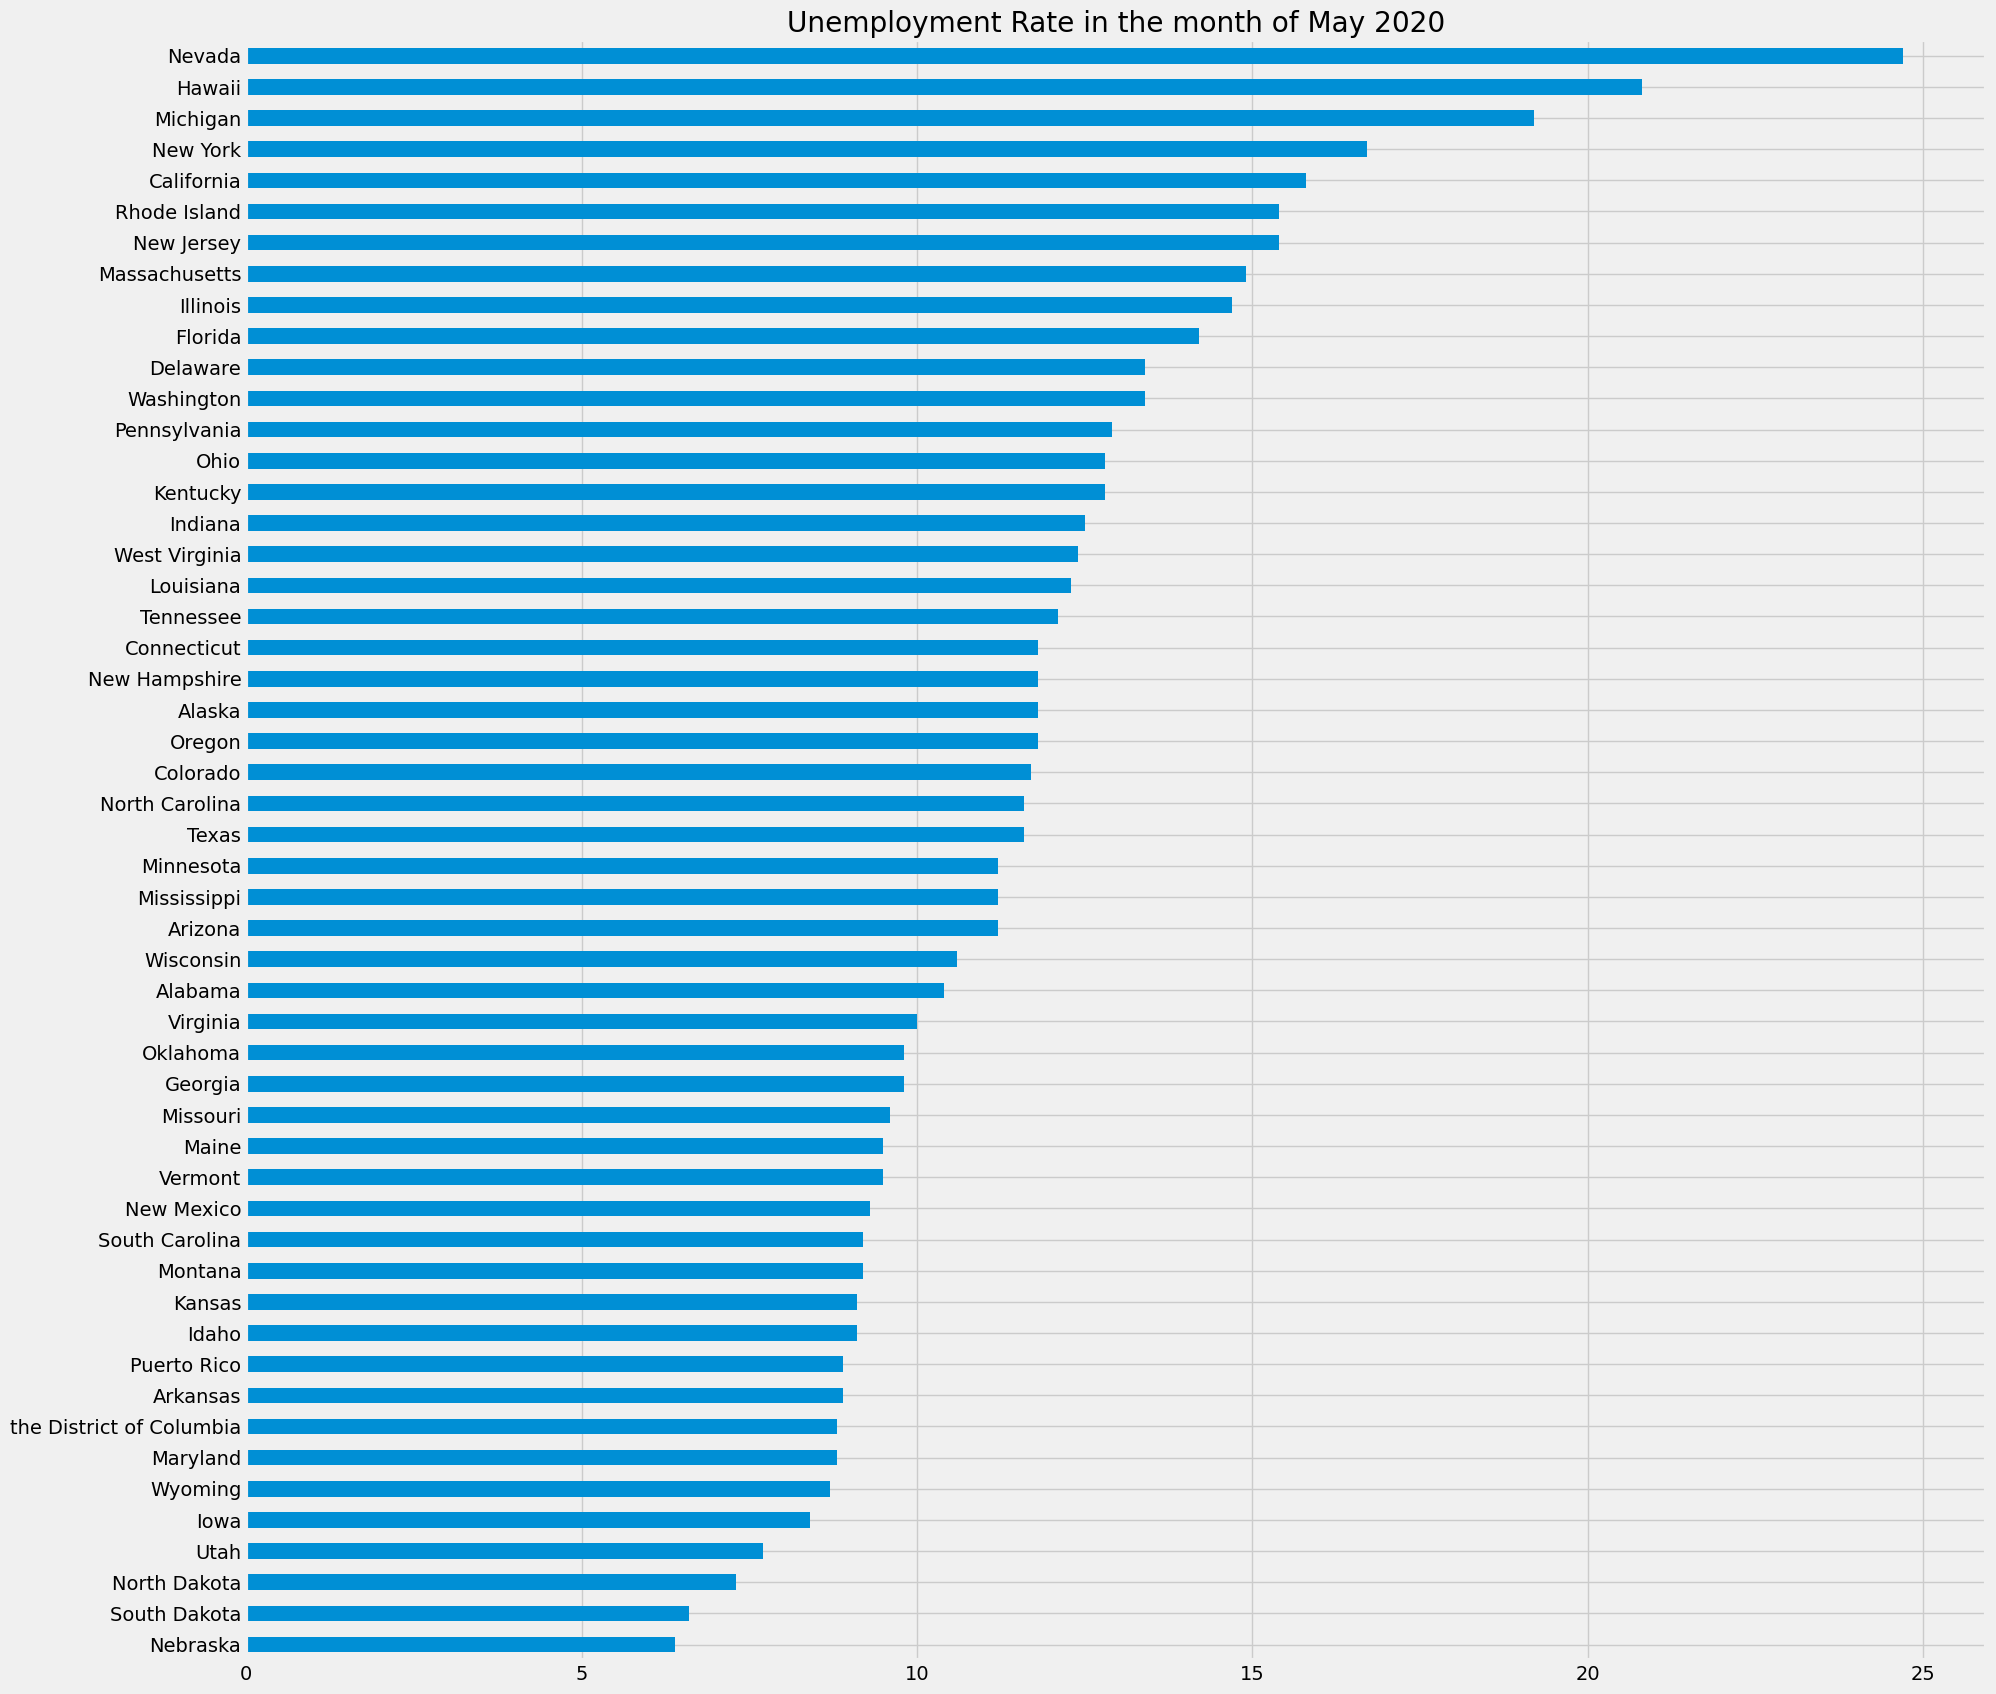

In [49]:
#This code selects the entire row containing unemp rate for all states in the month of May 2020. Then Transpose the obtained dataframe
#Sorts the values. This would return a dataframe with sorted values for the specified column name.
#Plot a horizontal bar graph on the dataframe obtained from sort_values()

unemp_rate_df[unemp_rate_df.index=='2020-05-01'].T\
.sort_values('2020-05-01')\
.plot(kind='barh',figsize=(20,20), title='Unemployment Rate in the month of May 2020').legend().remove() 

# Pull the Participation Rate data from Fred

In [51]:
#Searching for series with title "Labor Force Participation Rate for". Filter only those which have 'frequency' values as 'Monthly'
part_search_result = fred.search('Labor Force Participation Rate for', filter=('frequency','Monthly'))

In [52]:
#Select the rows satisfying the given condition
part_search_result = part_search_result.query('seasonal_adjustment=="Seasonally Adjusted" and observation_start=="1976-01-01"')

In [53]:
part_search_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-07-09,2024-07-09,Labor Force Participation Rate for California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-07-09,2024-07-09,Labor Force Participation Rate for Alabama,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:06-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-07-09,2024-07-09,Labor Force Participation Rate for New York,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-07-09,2024-07-09,Labor Force Participation Rate for Michigan,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:02-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-07-09,2024-07-09,Labor Force Participation Rate for Mississippi,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:02-05:00,21,A state's labor-force participation rate is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC24MACAM156S,LRAC24MACAM156S,2024-07-09,2024-07-09,Infra-Annual Labor Statistics: Labor Force Par...,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:09:19-05:00,1,OECD Data Filters: REF_AREA: CAN MEASURE: LF_...
LRAC64MACAM156S,LRAC64MACAM156S,2024-07-09,2024-07-09,Infra-Annual Labor Statistics: Labor Force Par...,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:09:17-05:00,1,OECD Data Filters: REF_AREA: CAN MEASURE: LF_...
LRACTTMACAM156S,LRACTTMACAM156S,2024-07-09,2024-07-09,Infra-Annual Labor Statistics: Labor Force Par...,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:09:15-05:00,1,OECD Data Filters: REF_AREA: CAN MEASURE: LF_...


# We do not need some rows in the 'part_search_result'

In [56]:
#Select the rows that we need to drop. 
#'rows_to_drop' will contain a series of boolean values with 'True' values only for the rows that we want to drop
rows_to_drop = part_search_result['title'].str.contains('Infra-Annual Labor')

In [60]:
#'indexes_to_drop' would contain the collection of row indices that we need to drop
indexes_to_drop = part_search_result[rows_to_drop].index

In [61]:
#Dropping the rows which are mentioned in 'indexes_to_drop'.
#axis=0 specifies we need to drop the rows.
part_search_result = part_search_result.drop(indexes_to_drop, axis=0)

In [64]:
part_search_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-07-09,2024-07-09,Labor Force Participation Rate for California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-07-09,2024-07-09,Labor Force Participation Rate for Alabama,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:06-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-07-09,2024-07-09,Labor Force Participation Rate for New York,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-07-09,2024-07-09,Labor Force Participation Rate for Michigan,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:02-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-07-09,2024-07-09,Labor Force Participation Rate for Mississippi,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:02-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2024-07-09,2024-07-09,Labor Force Participation Rate for Texas,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2024-07-09,2024-07-09,Labor Force Participation Rate for Florida,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:03-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2024-07-09,2024-07-09,Labor Force Participation Rate for Kentucky,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:02-05:00,20,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2024-07-09,2024-07-09,Labor Force Participation Rate for Ohio,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-25 09:37:07-05:00,14,A state's labor-force participation rate is th...


In [66]:
#checking how many rows are left
part_search_result.shape

(51, 15)

# Now we need to create a single dataframe that contains values of all 51 series

In [67]:
#Create a new list, to which we will append all the series one-by-one
series_lst=[]

In [69]:
#We will get each series from fred, convert it to a single column dataframe and append it to our series_lst.
for series_id in part_search_result.index:
    series = fred.get_series(series_id).to_frame(name=series_id)
    series_lst.append(series)
    

In [70]:
#We would create a dataframe by concating all the dataframe in the 'series_lst'.
#axis=1 specifies we are going to concat the columns of the dataframes
part_rate_df = pd.concat(series_lst, axis=1)

<IPython.core.display.Javascript object>

In [71]:
part_rate_df

,LBSSA06,LBSSA01,LBSSA36,LBSSA26,LBSSA28,LBSSA48,LBSSA12,LBSSA21,LBSSA39,LBSSA55,...,LBSSA33,LBSSA50,LBSSA09,LBSSA38,LBSSA46,LBSSA20,LBSSA11,LBSSA44,LBSSA10,LBSSA56
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,65.9,63.6,64.2,62.6,64.6,65.1,64.4,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,65.6,63.4,64.1,62.4,64.4,65.0,64.5,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,65.6,63.2,64.0,62.3,64.4,64.9,64.5,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,...,65.7,63.5,64.1,62.5,64.3,65.0,64.5,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,...,66.0,63.6,64.3,62.6,64.3,65.1,64.4,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,62.1,57.4,61.4,62.3,53.8,64.1,59.4,56.9,61.8,65.9,...,65.2,65.1,64.4,69.0,67.8,66.2,72.1,63.9,60.6,63.3
2024-02-01,62.1,57.4,61.4,62.2,53.7,64.1,59.4,56.9,61.8,65.7,...,65.2,65.3,64.5,68.9,67.8,66.1,72.3,64.1,60.5,63.1
2024-03-01,62.0,57.4,61.4,62.3,53.7,64.1,59.4,56.9,61.8,65.6,...,65.3,65.4,64.6,68.9,67.7,66.1,72.6,64.4,60.3,63.0
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,...,65.5,65.5,64.6,69.0,67.6,66.1,72.8,64.7,60.1,63.0


In [74]:
#select the 'title' column, replace the unwanted text with nothing('') so that we are left only with the name of the states
#convert it to a list
list_of_states = part_search_result['title'].str.replace('Labor Force Participation Rate for ', '').to_list()

In [75]:
#Assign the column names with the names of states
part_rate_df.columns = list_of_states

In [76]:
part_rate_df

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,...,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,District Of Columbia,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,65.9,63.6,64.2,62.6,64.6,65.1,64.4,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,65.6,63.4,64.1,62.4,64.4,65.0,64.5,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,65.6,63.2,64.0,62.3,64.4,64.9,64.5,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,...,65.7,63.5,64.1,62.5,64.3,65.0,64.5,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,...,66.0,63.6,64.3,62.6,64.3,65.1,64.4,63.6,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,62.1,57.4,61.4,62.3,53.8,64.1,59.4,56.9,61.8,65.9,...,65.2,65.1,64.4,69.0,67.8,66.2,72.1,63.9,60.6,63.3
2024-02-01,62.1,57.4,61.4,62.2,53.7,64.1,59.4,56.9,61.8,65.7,...,65.2,65.3,64.5,68.9,67.8,66.1,72.3,64.1,60.5,63.1
2024-03-01,62.0,57.4,61.4,62.3,53.7,64.1,59.4,56.9,61.8,65.6,...,65.3,65.4,64.6,68.9,67.7,66.1,72.6,64.4,60.3,63.0
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,...,65.5,65.5,64.6,69.0,67.6,66.1,72.8,64.7,60.1,63.0


# There are some differences in no. of states and their names in the participation df and unemployment df, we will correct those differences

In [79]:
#Get the array of state names from both the dataframes
participation_states = np.array(part_rate_df.columns)
unrate_states = np.array(unemp_rate_df.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
unrate_states=='California'

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [82]:
#unemp_rate_df has 52 states, while part_rate_df has 51
#so, iterate over all the states of unemp_rate_df and check whether a state is present in part_rate_df or not


for i in unrate_states:
    if np.any(participation_states==i): #numpy.any() method is given with an array of booleans, it will return True if there is any True value in the array
        print(i+' present') #print present if a state is present in the part_rate_df
    else :
        print(i+' not present') #print not present if the state is not found in part_rate_df
        
    

<IPython.core.display.Javascript object>

California present


<IPython.core.display.Javascript object>

Texas present


<IPython.core.display.Javascript object>

New York present


<IPython.core.display.Javascript object>

Florida present


<IPython.core.display.Javascript object>

Pennsylvania present


<IPython.core.display.Javascript object>

Ohio present


<IPython.core.display.Javascript object>

Michigan present


<IPython.core.display.Javascript object>

Alabama present


<IPython.core.display.Javascript object>

Massachusetts present


<IPython.core.display.Javascript object>

North Carolina present


<IPython.core.display.Javascript object>

Illinois present


<IPython.core.display.Javascript object>

New Jersey present


<IPython.core.display.Javascript object>

Georgia present


<IPython.core.display.Javascript object>

Colorado present


<IPython.core.display.Javascript object>

Arizona present


<IPython.core.display.Javascript object>

Wisconsin present


<IPython.core.display.Javascript object>

Virginia present


<IPython.core.display.Javascript object>

Kentucky present


<IPython.core.display.Javascript object>

South Carolina present


<IPython.core.display.Javascript object>

New Mexico present


<IPython.core.display.Javascript object>

Minnesota present


<IPython.core.display.Javascript object>

Tennessee present


<IPython.core.display.Javascript object>

Washington present


<IPython.core.display.Javascript object>

Maryland present


<IPython.core.display.Javascript object>

Oregon present


<IPython.core.display.Javascript object>

West Virginia present


<IPython.core.display.Javascript object>

Nevada present


<IPython.core.display.Javascript object>

Arkansas present


<IPython.core.display.Javascript object>

Oklahoma present


<IPython.core.display.Javascript object>

Missouri present


<IPython.core.display.Javascript object>

Alaska present


<IPython.core.display.Javascript object>

Iowa present


<IPython.core.display.Javascript object>

Utah present


<IPython.core.display.Javascript object>

Puerto Rico not present


<IPython.core.display.Javascript object>

Indiana present


<IPython.core.display.Javascript object>

Louisiana present


<IPython.core.display.Javascript object>

Hawaii present


<IPython.core.display.Javascript object>

North Dakota present


<IPython.core.display.Javascript object>

Montana present


<IPython.core.display.Javascript object>

the District of Columbia not present


<IPython.core.display.Javascript object>

Mississippi present


<IPython.core.display.Javascript object>

Maine present


<IPython.core.display.Javascript object>

Nebraska present


<IPython.core.display.Javascript object>

Connecticut present


<IPython.core.display.Javascript object>

Idaho present


<IPython.core.display.Javascript object>

New Hampshire present


<IPython.core.display.Javascript object>

Rhode Island present


<IPython.core.display.Javascript object>

Kansas present


<IPython.core.display.Javascript object>

Wyoming present


<IPython.core.display.Javascript object>

Delaware present


<IPython.core.display.Javascript object>

Vermont present


<IPython.core.display.Javascript object>

South Dakota present


In [84]:
#remove 'Puerto Rico' from the unemp_rate_df as it is not present in part_rate_df
unemp_rate_df.pop('Puerto Rico') #pop method reomoves the columns from dataframe in place. Also returns the removed column.

KeyError: 'Puerto Rico'

In [88]:
#Here we are renaming the column name. We are removing 'the' from 'the Disctrict of Columbia'
unemp_rate_df.rename(columns={'the District of Columbia':'District Of Columbia'}, inplace=True)

In [120]:
#We can see, the column name 'District of Columbia' in the below.
unemp_rate_df.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'West Virginia', 'Minnesota', 'Tennessee', 'Maryland',
       'Maine', 'North Carolina', 'Illinois', 'Louisiana', 'Georgia',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'District Of Columbia',
       'Rhode Island', 'Delaware', 'Wyoming'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

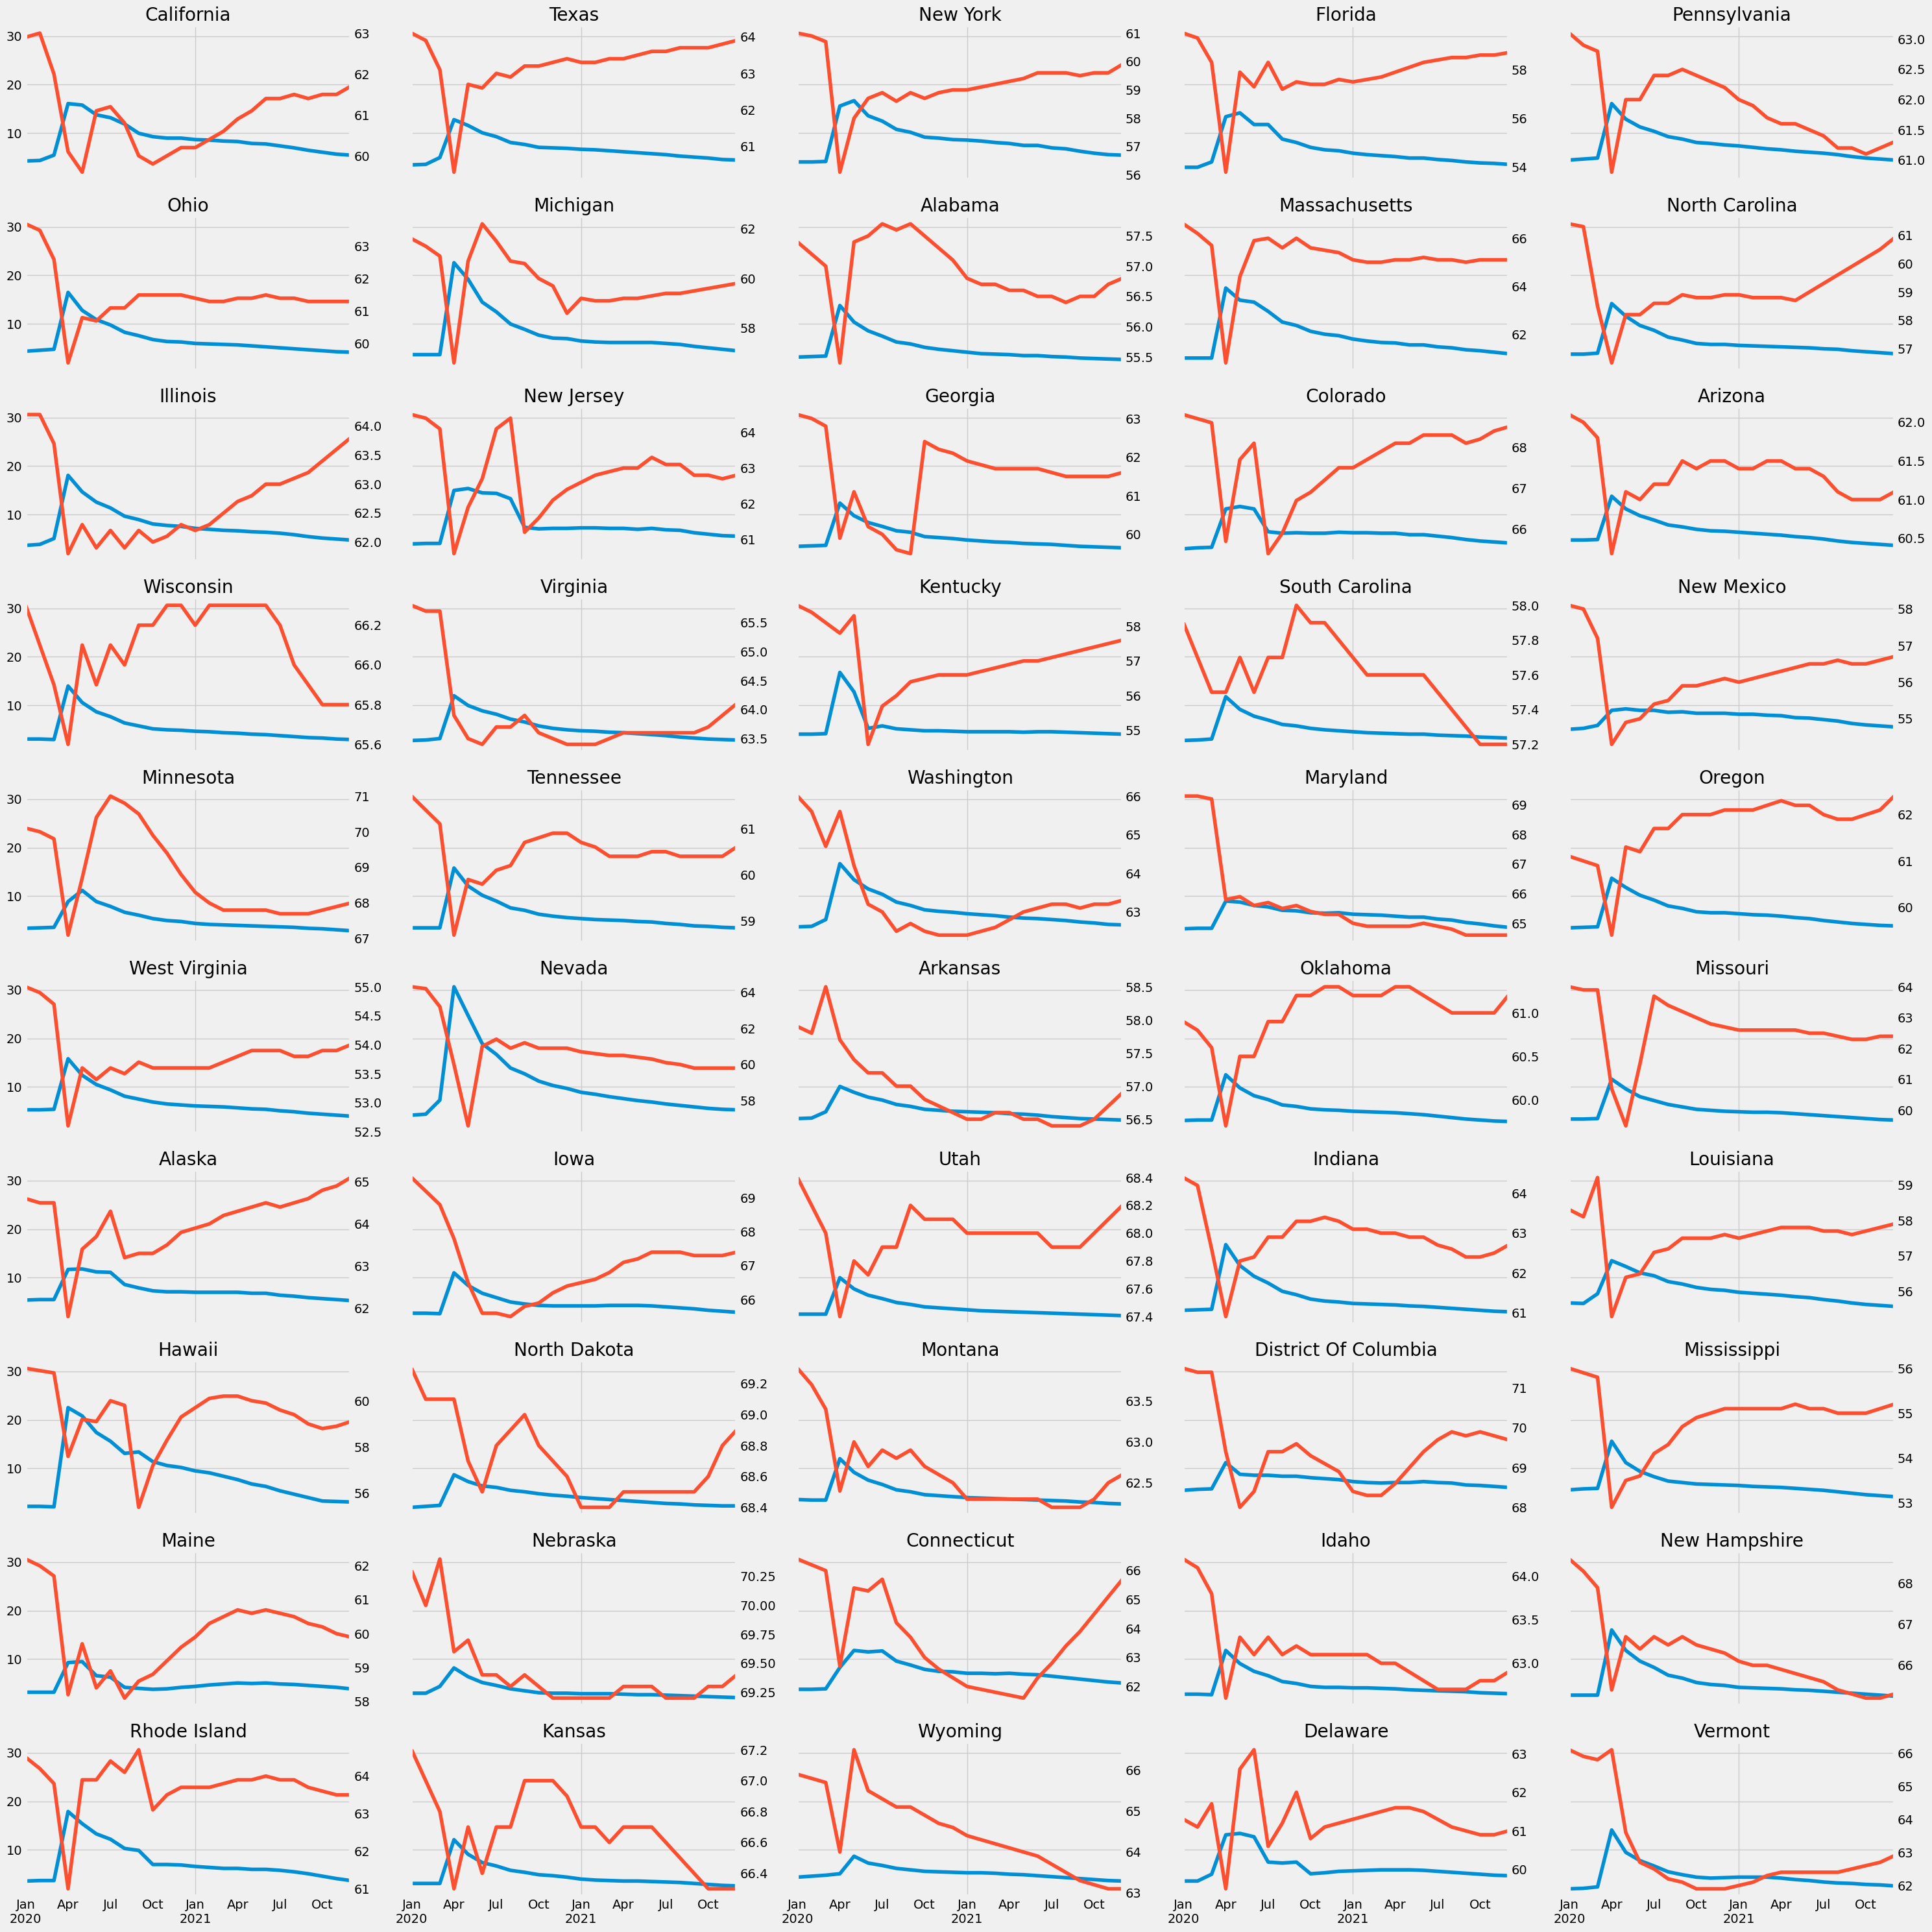

In [122]:
fig2, axes = plt.subplots(10,5, figsize=(30,30), sharey=True, sharex=True)

axes = axes.flatten()
states = unemp_rate_df.columns
for i in range(50):
    state = states[i]
    if state=='District of Columbia':
        continue
    
    axis2 = axes[i].twinx()
    unemp_rate_df.query('index>=2020 and index<2022')[state].plot(ax=axes[i])
    part_rate_df.query('index>=2020 and index<2022')[state].plot(ax=axis2,  color=color_pal[1])
    axis2.grid(False)
    axes[i].set_title(state)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<Axes: >

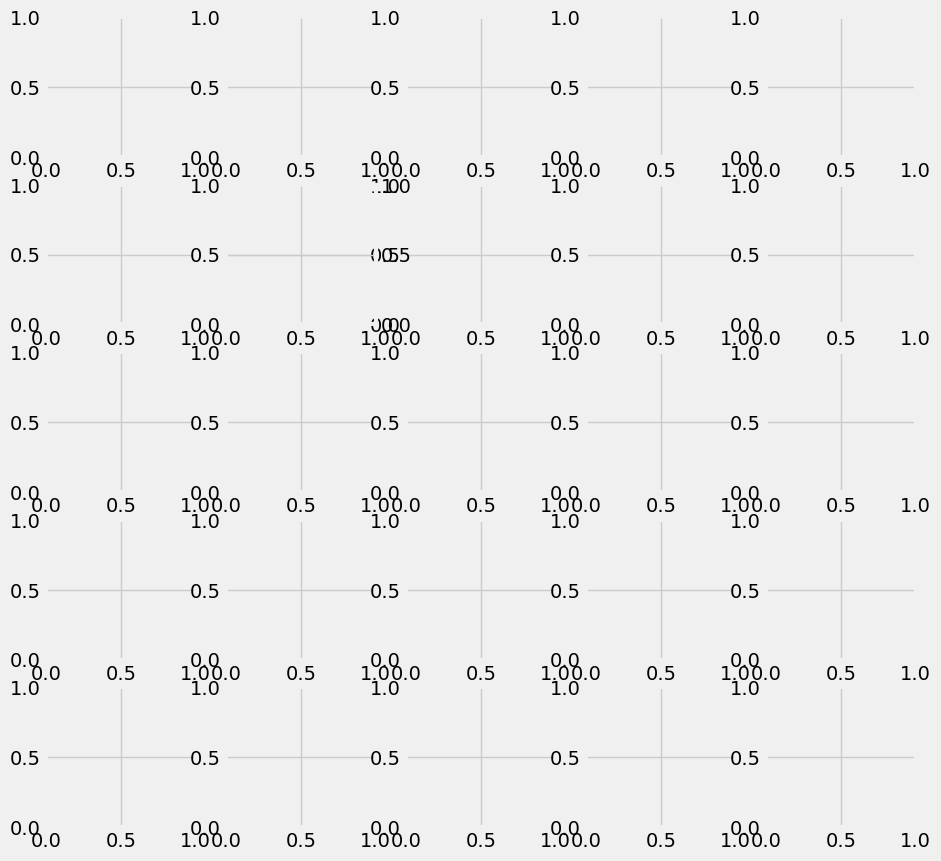

In [114]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
ax[1,1].twinx()


In [107]:
np.random.randn(10)

<IPython.core.display.Javascript object>

array([-1.30380848, -0.71074435, -0.33004263, -0.0861138 ,  1.7172332 ,
        1.19846548, -0.81022111,  0.18336052,  0.17865643, -0.85886313])

In [1]:
unrate_df = pd.read_pickle('unrate_df.pkl')
part_df = pd.read_pickle('part_df.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>